# Data Representation and Round-Off Errors [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ua-2025q3-astr501-513/ua-2025q3-astr501-513.github.io/blob/main/513/01/notes.ipynb)

```{note} Riddle
You have 1000 bottles of wine for a birthday party.
1 hours before the party, the winery indicates that 1 bottle is filled
with poison, but they don't know which one.
You have 10 lab mice to test this.
The poison is so strong that it will kill any mouse that drinks it
within 15 minutes.
Is there a way to find the poisoned bottle using the 10 mice before
the party?
```

## Representing Integers

Efficient number representation, as illustrated in the riddle, enables
us to solve seemingly impossible problems.
The evolution of numeral systems reflects humanity's progress toward
clarity and efficiency in expressing information.

* [**Unary System**](https://en.wikipedia.org/wiki/Unary_numeral_system):
  The simplest system, where each number is represented by identical
  marks.
  For example, 5 is written as
  ["|||||"](https://en.wikipedia.org/wiki/Tally_marks).
  While easy to understand and requiring no skill for addition, unary
  becomes impractical for large values: representing 888 requires 888
  marks.

* [**Roman Numerals**](https://en.wikipedia.org/wiki/Roman_numerals):
  An improvement over unary, Roman numerals use symbols such as I (1),
  V (5), X (10), L (50), C (100), D (500), and M (1000) to group large
  values.
  However, representing numbers like 888 (DCCCLXXXVIII) still requires
  12 symbols, which is somewhat cumbersome.

* [**Arabic Numerals**](https://en.wikipedia.org/wiki/Arabic_numerals):
  We may take it for granted and not appreciate it, but Arabic numeral
  system is a revolutionary advancement.
  It uses positional notation to represent numbers compactly and
  efficiently.
  For instance, 888 requires only three digits.

### Positional Notation Systems

The Arabic numeral system is an example of a
[**positional notation system**](https://en.wikipedia.org/wiki/Positional_notation),
where the value of a digit is determined by both the digit itself and
its position within the number.
This contrasts with systems like unary numbers or Roman numerals,
where the position of a symbol does not affect its value.
In positional notation, each digit's place corresponds to a specific
power of the system's base.

In a positional system, representing a number involves the following
steps:
1. Decide on the base (or radix) $b$.
2. Define the notation for the digits.
3. Write the number as:
   \begin{align}
   \pm (\dots d_3 d_2 d_1 d_0 . d_{-1} d_{-2} d_{-3} \dots),
   \end{align}
   which represents:
   \begin{align}
   \pm (\dots + d_3 b^3 + d_2 b^2 + d_1 b^1 + d_0 b^0 + d_{-1} b^{-1} + d_{-2} b^{-2} + d_{-3} b^{-3} + \dots).
   \end{align}

To convert a number from base $b$ to decimal, we apply this definition
directly.
For example:
\begin{align}
(256.4)_8 = 2\times8^2 + 5\times8^1 + 6\times8^0 + 4\times8^{-1} = (174.5)_{10}.
\end{align}

The most popular bases used in computer are:

### Binary Numbers

* Base: $b = 2$
* Digits: 0, 1

![Binary system was invented by merchants in medieval England](fig/measure.png)

The binary system has been used in various forms long before the age
of computers.
Invented by merchants in medieval England, the units of liquid measure
were based on the binary system. For example:
* 1 gallon = 2 pottles;
* 1 pottle = 2 quarts;
* 1 quart = 2 pints;
* 1 pint = 2 cups; etc.

Similarly, the binary system is used in music to define note
durations, i.e., whole note, half note, quarter note, eighth note,
sixteenth note, etc.
These everyday examples show the fundamental nature of the binary
system underpining modern computing.

![There are `10` types of people in the world...](fig/binary-shirt.png)

In the binary system, only two digits are used: 0 and 1.
The position of each digit in a binary number corresponds to a power
of 2, just as the position of a digit in the decimal system
corresponds to a power of 10.
For example, the binary number $1011_2$ represents:
$1 \times 2^3 + 0 \times 2^2 + 1 \times 2^1 + 1 \times 2^0$.
This gives the decimal value:
$1 \times 8 + 0 \times 4 + 1 \times 2 + 1 \times 1 = 11$.

In Python, you can use the `bin()` function to convert an integer to
its binary string representation, and the `int()` function to convert
a binary string back to an integer.
This is particularly useful when working with binary numbers in
computations.

In [1]:
# Convert an integer to a binary string
number = 10
binary = bin(number)

print(f"Binary representation of {number}: {binary}")

Binary representation of 10: 0b1010


In [2]:
# Convert a binary string back to an integer
binary = "0b1010" # the leading "0b" is optional
number = int(binary, 2)

print(f"Integer value of {binary}: {number}")

Integer value of 0b1010: 10


Note that the above examples use **formatted string literals**,
commonly known as "f-strings."
F-strings provide a concise and readable way to embed expressions
inside string literals by prefixing the string with an `f` or `F`
character.

Python supports representing binary numbers directly using the `0b`
prefix for literals.
This allows you to define binary numbers without converting from a
string format.

In [3]:
binary = 0b1010  # 10 in decimal

print(f"Binary number: {binary}")

Binary number: 10


### The Hexadecimal System

* Base: $b = 16$
* Digits: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, A, B, C, D, E, F

The hexadecimal system allows for writing a binary number in a very
compact notation.
It allows one to directly ready the binary content of a file, e.g.,
```
% hexdump -C /bin/sh | head
00000000  ca fe ba be 00 00 00 02  01 00 00 07 00 00 00 03  |................|
00000010  00 00 40 00 00 00 6a b0  00 00 00 0e 01 00 00 0c  |..@...j.........|
00000020  80 00 00 02 00 00 c0 00  00 00 cb 70 00 00 00 0e  |...........p....|
00000030  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
*
00004000  cf fa ed fe 07 00 00 01  03 00 00 00 02 00 00 00  |................|
00004010  11 00 00 00 c0 04 00 00  85 00 20 00 00 00 00 00  |.......... .....|
00004020  19 00 00 00 48 00 00 00  5f 5f 50 41 47 45 5a 45  |....H...__PAGEZE|
00004030  52 4f 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |RO..............|
00004040  00 00 00 00 01 00 00 00  00 00 00 00 00 00 00 00  |................|
```
or directly select a color

![Hex numbers are used to select colors.](fig/color.png)

Python also supports working with hexadecimal numbers, which are
represented using the `0x` prefix.
Below are examples demonstrating how to handle hexadecimal numbers in
Python.

In [4]:
number = 255
hexrep = hex(number)

print(f"Hexadecimal representation of {number}: {hexrep}")

Hexadecimal representation of 255: 0xff


In [5]:
hexrep = "0xff"
number = int(hexrep, 16)

print(f"Integer value of {hexrep}: {number}")

Integer value of 0xff: 255


In [6]:
hexrep = 0xff  # 10 in decimal

print(f"Hexadecimal number: {hexrep}")

Hexadecimal number: 255


```{note} Quantum Computing: A New Type of Number Representation

Quantum computing takes number representation to a whole new level.
In quantum mechanics, data is represented using quantum bits, or
qubits.
Unlike classical bits, a single qubit can exist in a superposition of
two states, $|0\rangle$ and $|1\rangle$, simultaneously.
This means that (ignoring normalization for now) one qubit can
represent two numbers $C_0$ and $C_1$ as in $C_0 |0\rangle + C_1
|1\rangle$.

With two qubits, the system can represent four possible states:
$|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$, again, in
superposition.
The number of possible states grows exponentially as more qubits are
added:
* Three qubits can represent eight states: $|000\rangle$,
  $|001\rangle$, $|010\rangle$, ..., $|111\rangle$.
* Four qubits represent 16 states, and so on.

In general, $n$ qubits can represent $2^n$ states at once.
This exponential scaling is what gives quantum computers their
enormous potential to perform certain types of calculations far more
efficiently than classical computers.

For example, IBM's 53-qubit quantum computer can represent $2^{53}$
states simultaneously.
In terms of classical information, this is equivalent to storing
approximately 1 petabyte (PB) of data, which is comparable to the
amount of memory available in some of the world's largest
supercomputers today.
```

```{note} Superposition Hypothesis in Large Language Models

The [Superposition
Hypothesis](https://transformer-circuits.pub/2022/toy_model/index.html)
in large language models (LLMs) proposes that individual neurons or
parameters can encode multiple overlapping features, depending on
context.
This is analogous to quantum superposition, where qubits represent
multiple states simultaneously.

For example, a single neuron in an LLM might activate for both "dog"
and "pet," enabling efficient reuse of parameters.

This ability is further supported by high-dimensional embeddings,
where concepts are represented as nearly orthogonal vectors.
This allows the LLM to store and distinguish vast amounts of
information with minimal interference.
The
[Johnson-Lindenstrauss Lemma](https://en.wikipedia.org/wiki/Johnson%E2%80%93Lindenstrauss_lemma)
explains how high-dimensional spaces accommodate such efficient
representations.

While the Superposition Hypothesis provides a promising explanation
for the efficiency of LLMs, it remains an area of active research to
fully understand the mechanisms underlying their success.
```

## Hardware Implementations

> The decimal system has been established, somewhat foolishly to be
> sure, according to man's custom, not from a natural necessity as most
> people think.
> <div style="text-align: right">- Blaise Pascal (1623--1662)</div>

Binary operators are the foundation of computation in digital
hardware.

### Basic Binary Operators

1. AND Operator (`&`)
   ```{code}
   | A | B | A & B |
   |---|---|-------|
   | 0 | 0 |   0   |
   | 0 | 1 |   0   |
   | 1 | 0 |   0   |
   | 1 | 1 |   1   |
   ```

2. OR Operator (`|`)
   ```{code}
   | A | B | A | B |
   |---|---|-------|
   | 0 | 0 |   0   |
   | 0 | 1 |   1   |
   | 1 | 0 |   1   |
   | 1 | 1 |   1   |
   ```

3. XOR Operator (`^`)
   ```{code}
   | A | B | A ^ B |
   |---|---|-------|
   | 0 | 0 |   0   |
   | 0 | 1 |   1   |
   | 1 | 0 |   1   |
   | 1 | 1 |   0   |
   ```

4. NOT Operator (`~`)
   ```{code}
   | A | ~A |
   |---|----|
   | 0 |  1 |
   | 1 |  0 |
   ```

5. NAND and NOR Operators
   * **NAND (NOT AND):** Outputs `0` only when both inputs are `1`.
   * **NOR  (NOT OR):**  Outputs `1` only when both inputs are `0`.

### CMOS Implementation

Logic gates are built using
[CMOS (Complementary Metal-Oxide-Semiconductor)](https://en.wikipedia.org/wiki/CMOS)
technology, which utilizes:
* **PMOS Transistors:** Conduct when the input is low (logic `0`).
* **NMOS Transistors:** Conduct when the input is high (logic `1`).

![Cross section of two transistors in a CMOS gate, in an N-well CMOS process.](fig/cmos.png)

In the above figure, the terminals of the transistors are labeled as
follows:

* **Source (S):**
  The terminal where carriers (electrons or holes) enter the
  transistor.
  For NMOS transistors, the source is typically connected to a lower
  potential (e.g., ground), while for PMOS transistors, it is
  connected to a higher potential (e.g., Vdd).

* **Gate (G):**
  The terminal that controls the flow of carriers between the source
  and drain.
  Applying a voltage to the gate creates an electric field that either
  allows or prevents current flow, effectively acting as a switch.

* **Drain (D):**
  The terminal through which carriers exit the transistor.
  For NMOS transistors, the drain is usually connected to a higher
  potential, while for PMOS transistors, it is connected to a lower
  potential.

* **Body (B):**
  Also known as the bulk or substrate, this terminal is typically
  connected to a fixed reference potential.
  For NMOS transistors, the body is often connected to ground, and for
  PMOS transistors, it is connected to Vdd.
  The body helps control leakage currents and influences the
  transistor's threshold voltage.

By manipulating the voltage at the gate terminal, transistors act as
switches.
They then enable or disable the flow of current between the source
and drain.
This non-linear switching behavior supports the operation of all logic
gates and digital circuits.

Here are some CMOS Gate Examples
1. **NOT Gate:**
   * **PMOS:** Connects the output to `Vdd` (high) when the input is
     low.
   * **NMOS:** Connects the output to ground (low) when the input is
     high.
2. **NAND Gate:**
   * **PMOS:** Two transistors in parallel connect to `Vdd` if either
     input is low.
   * **NMOS:** Two transistors in series connect to ground only if
     both inputs are high.
3. **NOR Gate:**
   * **PMOS:** Two transistors in series connect to `Vdd` only if both
     inputs are low.
   * **NMOS:** Two transistors in parallel connect to ground if either
     input is high.

```{note}
Although for LED, this
[Veritasium Video](https://youtu.be/AF8d72mA41M?si=Tq26bYZhn6kFAVC6)
explains semiconductor technology extremely well.
```

### Universal Gates

**NAND** and **NOR** gates are also called **universal gates** because
any other logic gate can be constructed using just these gates.
Universal gates are fundamental in hardware design, as they simplify
manufacturing by reducing the variety of components needed.

In practice, the NAND gate is widely used in the industry due to
several advantages:
* Less delay
* Smaller silicon area
* Uniform transistor sizes

An NAND gate's truth table looks like this:
```{code}
| A | B | NAND(A, B) |
|---|---|------------|
| 0 | 0 | 1          |
| 0 | 1 | 1          |
| 1 | 0 | 1          |
| 1 | 1 | 0          |
```
Here is a simple Python function for the NAND gate:

In [7]:
def NAND(a, b):
    return 1 - (a & b)  # NOT (a AND b)

We can now construct basic gates using only NAND:

In [8]:
# A NOT gate can be built by connecting both inputs of a NAND gate to the same value.

def NOT(a):
    return NAND(a, a)

# Test
print(NOT(0)) # Output: 1
print(NOT(1)) # Output: 0

1
0


In [9]:
# An AND gate can be built by negating the output of a NAND gate.

def AND(a, b):
    return NOT(NAND(a, b))

# Test
print(AND(0, 0))  # Output: 0
print(AND(0, 1))  # Output: 0
print(AND(1, 0))  # Output: 0
print(AND(1, 1))  # Output: 1

0
0
0
1


In [10]:
# HANDSON: implement an OR gate using only NAND.
#
# HINT: Using De Morgan's law: A | B = ~(~A & ~B).

def OR(a, b):
    return NAND(NOT(a), NOT(b))

# Test
print(OR(0, 0))  # Output: 0
print(OR(0, 1))  # Output: 1
print(OR(1, 0))  # Output: 1
print(OR(1, 1))  # Output: 1

0
1
1
1


In [11]:
# HANDSON: implement an XOR gate using only NAND.

def XOR(a, b):
    c = NAND(a, b)
    return NAND(NAND(a, c), NAND(b, c))

# Test
print(XOR(0, 0))  # Output: 0
print(XOR(0, 1))  # Output: 1
print(XOR(1, 0))  # Output: 1
print(XOR(1, 1))  # Output: 0

0
1
1
0


## Addition in the Binary System

In the binary system, addition follows similar rules to decimal
addition, but with only two digits: 0 and 1.
The key rules are:
```{code}
0 + 0 = 0
0 + 1 = 1
1 + 0 = 1
1 + 1 = 0, 1 carryover
```

We start from the rightmost bit, adding the bits with carry when
needed:
```{code}
    C = 111
    A = 0101 (  A = 5)
    B = 0011 (  B = 3)
-------------
A + B = 1000 (A+B = 8)
```

### Half Adder: Building Blocks for Addition

A **half adder** is a fundamental circuit used to add two single-bit
binary numbers.
It produces two outputs:
* **Sum**: The result of the XOR operation between the two inputs.
* **Carry**: The result of the AND operation between the two inputs,
  representing an overflow to the next bit.

!["Half" adder](fig/half.png)

However, the half adder is limited because it does not account for a
carry input from a previous addition.
This is why it is called a "half" adder---it handles only the addition
of two bits without any carry forwarding.

The logic for a half adder can be represented as:
```{code}
A + B = S , C
-------------
0 + 0 = 0 , 0
0 + 1 = 1 , 0
1 + 0 = 1 , 0
1 + 1 = 0 , 1
```

This simplicity makes the half adder a foundational component for
building more complex adders, like the full adder.

In [12]:
def half_adder(A, B):
    S = XOR(A, B)  # Sum using XOR
    C = AND(A, B)  # Carry using AND
    return S, C

# Test
print(half_adder(0, 0))
print(half_adder(0, 1))
print(half_adder(1, 0))
print(half_adder(1, 1))

(0, 0)
(1, 0)
(1, 0)
(0, 1)


### Building a Full Adder Using NAND

A **full adder** extends the half adder by adding a carry input.
It is capable of handling three inputs:
* `A`:   First bit
* `B`:   Second bit
* `Cin`: Carry from the previous bit addition

It produces two outputs:
* `S`:    Result of adding `A`, `B`, and `Cin`.
* `Cout`: Overflow to the next higher bit.

It can be implemented using two half adder and an OR gate:

!["Full" adder.](fig/full.png)

In [13]:
def full_adder(A, B, Cin):
    s, c = half_adder(A,   B)
    S, C = half_adder(Cin, s)
    Cout = OR(c, C)
    return S, Cout

# Test
print(full_adder(0, 0, 0))  # Output: (0, 0)
print(full_adder(1, 0, 0))  # Output: (1, 0)
print(full_adder(1, 1, 0))  # Output: (0, 1)
print(full_adder(1, 1, 1))  # Output: (1, 1)

(0, 0)
(1, 0)
(0, 1)
(1, 1)


### Multi-Bit Adder

A **multi-bit adder** combines multiple full adders to add two binary
numbers of arbitrary length.
Each full adder handles one bit, with the carry output of one adder
serving as the carry input to the next.

For example, to add two 4-bit binary numbers `A3 A2 A1 A0` and `B3 B2
B1 B0`:
1. Set the initial carry to 0
2. Use full adders for all bits.
Then, we can combine multiple full adders to make multi-bit adders.

![Multi-digit adder.](fig/multi.png)

In [14]:
def multibit_adder(A, B, carrybit=False):
    assert(len(A) == len(B))
    
    n = len(A)
    c = 0
    S = []
    for i in range(n):
        s, c = full_adder(A[i], B[i], c)
        S.append(s)
    if carrybit:
        S.append(c)  # add the extra carry bit
    return S

# Test
A = [1, 1, 0, 1]  # 1 + 2 + 8 = 11 in binary
B = [1, 0, 0, 1]  # 1 + 8 = 9 in binary
print(multibit_adder(A, B, carrybit=True))  # Output: [0, 0, 1, 0, 1] = 4 + 16 = 20 in binary

[0, 0, 1, 0, 1]


### Number of Bits in an Integer

The number of bits used to store an integer determines the range of
values it can represent.
* For **unsigned integers**, the range is $[0, 2^b - 1]$, where $b$ is
  the number of bits.
* For **signed integers**, one bit is used for the sign, leaving $n-1$
  bits for the value.
The range for signed integers is usually $[-2^{n-1}, 2^{n-1} - 1]$
(see below).

For example:
* An 8-bit unsigned integer represents values from 0 to 255.
* An 8-bit signed integer represents values from -128 to 127.

In modern programming languages, integers may be implemented as
fixed-width (e.g., 8, 16, 32, 64 bits) or variable-width types.

### Overflow and Underflow Error

The `multibit_adder()` example above clearly shows that adding two
$b$-bit integer may result a $(b+1)$-bit integer.

In computing, **overflow error** occurs when an integer calculation
exceeds the maximum value that can be represented within the allocated
number of bits.
For example, in a 32-bit unsigned integer, the maximum value is
$2^{32} - 1$ (= 4,294,967,295).
Adding 1 to this value causes the result to "wrap around" to the
minimum value 0.
Similarly, underflow occurs when subtracting below the minimum value.

To mitigate these errors, some programming languages and compilers
provide tools to detect overflow or implement arbitrary-precision
integers, which grow dynamically to store larger values.
Specifically, Python's `int` is unbounded and dynamically adjusts to
the size of the number.

### Representation of Negative Numbers

The most common method in modern computer to represent negative
integers is **two's complement**, where:
1. Positive numbers are represented as usual in binary.
2. To represent a negative number:
   * Write the binary representation of its absolute value.
   * Invert all the bits (change 1 to 0 and 0 to 1).
   * Add 1 to the result.

For example, in an 8-bit system:
* $+5$ is represented as `00000101`.
* $-5$ is represented as `11111011`.

Advantages of two's complement include:
* A single representation for 0.
* Efficient hardware implementation for addition and subtraction.
* The most significant bit (MSB) acts as the **sign bit**: 0 for
  positive, 1 for negative.

Less common representations include **sign-magnitude** and **one's
complement**, but these are mostly historical or used in niche
applications.

### Integer Conversion

Integer conversion refers to changing the representation of an integer
between different sizes or types.
There are two main cases:

**1. Narrowing Conversion:**
This involves converting an integer from a larger type to a smaller
type (e.g., 32-bit to 16-bit).
If the value exceeds the range of the smaller type, it may result in
truncation or overflow, often leading to incorrect results.

**Example:**
Converting $2^{16} + 1$ from a 32-bit integer to a 16-bit integer
results in $1$ (wrap-around effect).

**2. Widening Conversion:**
This involves converting an integer from a smaller type to a larger
type (e.g., 16-bit to 32-bit).
This is typically safe, as the larger type can represent all values of
the smaller type without loss of information.

When converting signed to unsigned integers (or vice versa), the sign
bit may be misinterpreted if not handled properly, leading to
unexpected results.
Some languages, like Python, automatically handle such conversions due
to their use of arbitrary-precision integers, but others, like C,
require explicit care to avoid bugs.


```{note} Data type conversion errors can be very costly

[Ariane 5](https://en.wikipedia.org/wiki/Ariane_5) is the primary
launch vehicle of the European Space Agency (ESA) that operates from
the Guiana Space Center near Kourou in the French Guiana.
Its first successful operational flight took place in December 1999,
when it carried to space the European X-ray Multi Mirror (XMM)
satellite.
Its first test launch, however, on June 4, 1996 resulted in failure,
with the rocket exploding 40 seconds into the flight.

A study of the accident by an inquiry board found that the failure was
caused by a software problem in the Inertial Reference System that was
guiding the rocket.
In particular, the computer program, which was written in the Ada
programming language and was inherited from the previous launch
vehicle Ariane 4, required at some point in the calculation a
conversion of a 64-bit floating point number to a 16-bit integer.
The initial trajectory of the Ariane 5 launch vehicle, however, is
significantly different than that of Ariane 4 and the 16 bits are not
enough to store some of the required information.
The result was an error in the calculation, which the inertial system
misinterpreted and caused the rocket to veer off its flight path and
explode.
The cost of the failed launch was upwards of 100 million dollars!
```

## Representing Real Numbers

```{note} A Moment of ZEN

Q: What is the output of this simple code?
What is the last value of `x` it will print?

:::python
x = 0
while x < 1:
    x += 0.1
    print(f"{x:g}")
:::

To see the problem, change the f-string to `print(f"{x:.17f}")`.
```

In [15]:
# HANDSON: run the above code here ...


```{note} Rounding Errors Can Have Fatal Consequences

On February 25, 1991, during Operation Desert Storm, a Scud missile
struck a U.S. army barracks in Dhahran, Saudi Arabia, killing 28
soldiers.
The base was protected by a Patriot Air Defense System, but the system
failed to intercept the missile due to a rounding error in its
tracking software.

The Patriot system relies on radar to detect airborne objects and a
computer to calculate their trajectories based on time, tracked in
increments of 0.1 seconds.
However, in binary form, 0.1 seconds is represented as an infinite
repeating decimal, $(0.1)_{10} = (0.0001100011…)_2$, which must be
rounded during calculations.
This small rounding error accumulated over time, and after 300 hours
of continuous operation, it caused the system to miscalculate the
missile's trajectory.
As a result, the Patriot failed to identify the Scud as a threat,
leading to the tragic loss of life.
```

### Floating Point Representation

The easiest way to describe floating-point representation is through
an example.
Consider the result of the mathematical expression $e^6 \approx
403.42879$.
To express this in normalized floating-point notation, we first write
the number in scientific notation:
\begin{align}
e^6 = 4.0342879 \times 10^2
\end{align}

In scientific notation, the number is written such that the
significand (or mantissa) is always smaller than the base (in this
case, 10).
To represent the number in floating-point format, we store the
following components:
* The sign of the number,
* The exponent (the power of 10),
* The significand (the string of significant digits).

For example, the floating-point representation of $e^6$ with 4
significant digits is:
\begin{align}
e^6 = (+, 2, 4034).
\end{align}
And with 8 significant digits:
\begin{align}
e^6 = (+, 2, 40342879).
\end{align}

### Single-Precision Floating Point

![The value $+0.15625 = (-1)^{(0)_2} \times 2^{(01111100)_2-127} \times
(1.01...0)_2$ stored as single precision float.](fig/float.svg)

The IEEE 754 standard for floating-point arithmetic, used by most
modern computers, defines how numbers are stored in formats like
single precision (32-bit).
A normalized number's significand includes an implicit leading 1
before the binary point, so only the fractional part (bits after the
binary point) is stored.
For instance, the binary number `1.101` is stored as `101`, with the
leading `1` assumed. This saves space while effectively adding an
extra bit of precision.

The exponent is stored with a "bias" of 127 in single precision.
This means the actual exponent is calculated as `stored_exponent -
127`, allowing representation of both positive and negative exponents.
The smallest stored exponent (`0`) corresponds to an actual exponent
of -127, and the largest (`255`) corresponds to +128.
Single-precision numbers, such as `np.single` in `NumPy` and `float`
in `C`, can represent values ranging approximately from $2^{-127}
\approx 6 \times 10^{-39}$ to $2^{128} \approx 3 \times 10^{38}$.

### Double-Precision Floating Point

![Memeory layout of a double precision float.](fig/double.svg)

For double precision (64-bit), the exponent is stored with a bias of
`1023` and the significand with an implicit leading 1 is stored in 52
bits.
The exponent can represent values from -1023 to +1024.
Double-precision numbers can represent values ranging from
approximately $10^{-308}$ to $10^{308}$, corresponding to the `double`
type in C or `np.double` in Python/NumPy.

```{note} Creative Usage of Floating Point Numbers

![The moving mesh code Arepo.](fig/arepo1.png)

The Arepo cosmology code, widely used in astrophysical simulations,
employs a moving mesh method to solve fluid dynamics problems with
high accuracy and efficiency.

![The fast maping between 53-bit integer and double precision float.](fig/arepo2.png)

To avoid numerical issues commonly encountered in floating-point
arithmetic, Arepo implements an innovative approach to ensure
robustness in geometric computations.
Specifically, it maps the significant digits of double-precision
floating-point numbers to a 53-bit integer, which allows for exact
arithmetic when evaluating geometric predicates.
By doing this, Arepo avoids round-off errors that could otherwise
compromise the accuracy of simulations.
This precise handling of numerical data is critical for the accurate
modeling of complex cosmological structures.
```

### Machine Accuracy

In order to quantify round-off errors, we define:
\begin{align}
\text{(relative error)} \equiv \frac{x - \bar{x}}{x}.
\end{align}

If we use a numeral system of base $b$ and keep $p$ significant
digits, the machine accuracy is
\begin{align}
\epsilon = \left(\frac{b}{2}\right) b^{-p}.
\end{align}

A single-precision floating-point number, which stores 23 significant
digits in binary (the mantissa), provides a machine accuracy of
approximately $\epsilon_\mathrm{single} = 2^{-23} \approx 10^{-7}$ in
decimal.
In contrast, a double-precision floating-point number, with 52
significant binary digits, corresponds to a much finer machine
accuracy of about $\epsilon_\mathrm{double} = 2^{-52} \approx
2\times10^{-16}$ in decimal.

### Accumulation of round-off errors

Round-off errors accumulate during iterative processes or summations
when many floating-point operations are involved.
This effect becomes more pronounced as the number of operations
increases.

In [16]:
def simple_sum(x, n):
    s = 0.0
    for i in range(n):
        s += x
    return s

In [17]:
x = 0.1
n = 10
s = simple_sum(x, n)
e = abs(s/n - x) / x
print(f"Mean = {s}; relative error = {e}")

Mean = 0.9999999999999999; relative error = 1.3877787807814457e-16


We may study how the relative error grows with the number of
summations.
The following figure illustrates the instability of the naive
summation method.

In [18]:
N        = [2**p for p in range(10,25)]
E_simple = [abs(simple_sum(x, n)/n - x) / x for n in N]

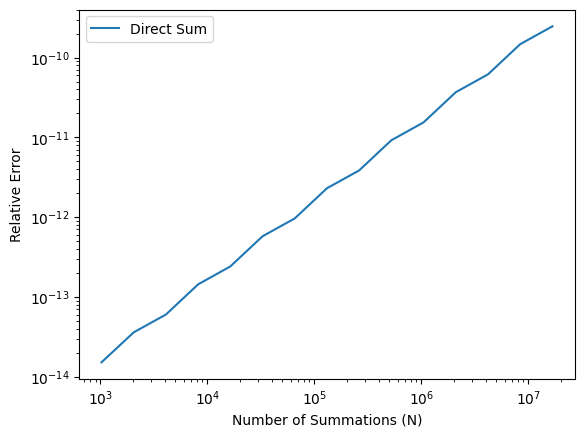

In [19]:
from matplotlib import pyplot as plt

plt.loglog(N, E_simple, label='Direct Sum')
plt.xlabel('Number of Summations (N)')
plt.ylabel('Relative Error')
plt.legend()
plt.show()  # optional in Jupyter Notebook

The
**[Kahan summation algorithm](https://en.wikipedia.org/wiki/Kahan_summation_algorithm)**
is a method designed to minimize round-off errors during summation.
By maintaining a separate compensation variable, it accounts for small
errors that would otherwise be lost.

In [20]:
def Kahan_sum(x, n):
    c = 0.0 # compensation for lost low-order bits
    s = 0.0
    for i in range(n):
        xp = x - c # apply compensation
        c  = ((s + xp) - s) - xp # update compensation
        s += x - c # update sum
    return s

In [21]:
E_Kahan = [abs(Kahan_sum(x, n)/n - x) / x for n in N]

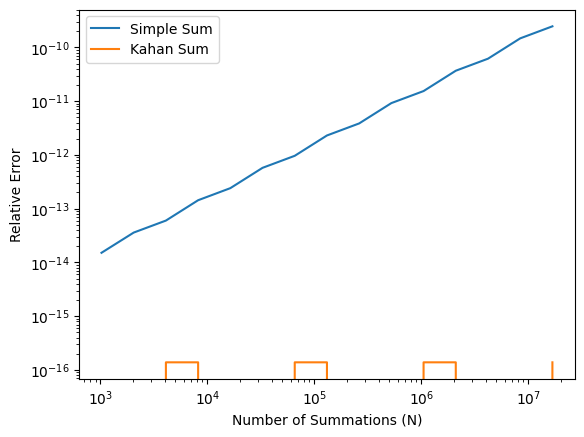

In [22]:
plt.loglog(N, E_simple, label='Simple Sum')
plt.loglog(N, E_Kahan,  label='Kahan Sum')
plt.xlabel('Number of Summations (N)')
plt.ylabel('Relative Error')
plt.legend()
plt.show() # optional in Jupyter Notebook

It is not recommended to write a for-loop in Python to sum numbers.
Instead, `numpy.sum()` is usually a better choice.
The `numpy.sum()` uses a more numerically accurate **"partial pairwise
summation"** (see its
[documentation](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)
and
[source code](https://github.com/numpy/numpy/blob/v2.2.0/numpy/_core/fromnumeric.py#L2338-L2469)).
Here, we simply will try it out.

In [23]:
import numpy as np

def numpy_sum(x, n):
    X = np.repeat(x, n)
    return np.sum(X)

In [24]:
E_numpy = [abs(numpy_sum(x, n)/n - x) / x for n in N]

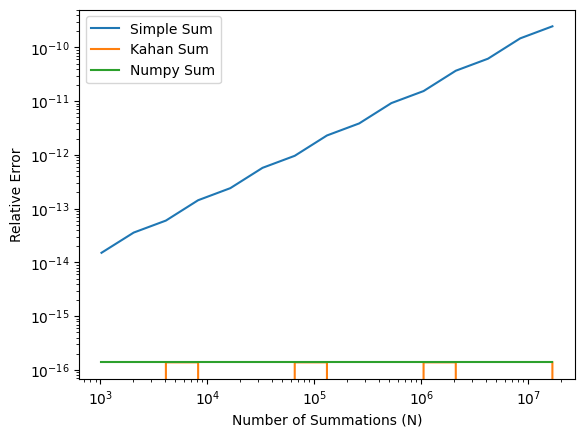

In [25]:
plt.loglog(N, E_simple, label='Simple Sum')
plt.loglog(N, E_Kahan,  label='Kahan Sum')
plt.loglog(N, E_numpy,  label='Numpy Sum')
plt.xlabel('Number of Summations (N)')
plt.ylabel('Relative Error')
plt.legend()
plt.show() # optional in Jupyter Notebook

In the first homework, we will look into a concept called
"catastrophic cancellation" and implement an algorithm that can handle
it.

## Catastrophic Cancellation

```{note} Another Moment of ZEN
Q: What is the output of this simple code?

:::python
from math import exp

for tau in range(0, 60, 5):
    I = exp(tau) - (exp(tau) - 1.0)
    print(f"{tau=}, {I=}")
:::
```

In [26]:
# HANDSON: run the above code here ...


We all learned in high school that the solutions (roots) to the
qudratic equation $a x^2 + b x + c = 0$ is
\begin{align}
x = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2a}.
\end{align}

Q: Why one of the roots become zero when solving the qudratic equation
with $b = 1$ and $a = c = 10^{-9}$?

In [27]:
a = 1e-9
b = 1
c = 1e-9

x1 = (-b + (b*b - 4*a*c)**(1/2)) / (2*a)
x2 = (-b - (b*b - 4*a*c)**(1/2)) / (2*a)

print(f'{x1:.16f}, {x2:.16f}')

0.0000000000000000, -999999999.9999998807907104


It is straightforward to show in the limit $a, c \ll b$, the roots are
\begin{align}
x \approx -\frac{b}{a} \mbox{ or } -\frac{c}{b}
\end{align}
Is it possible to recover the small root $-c/b$?

When $b > 0$, a catastrophic cancellation (see below) happens only in
the "+" equation.
We may replace the first qudratic equation by its "conjugate" form
\begin{align}
x = \frac{2c}{-b \mp \sqrt{b^2 - 4 a c}}
\end{align}

Equivalently, we may use the "numerically stable form",
\begin{align}
x_1 &= \frac{-b - \mathrm{sign}(b)\sqrt{b^2 - 4 a c}}{2a} \\
x_2 &= \frac{c}{a x_1}
\end{align}
as used by
[GSL](https://git.savannah.gnu.org/cgit/gsl.git/tree/poly/solve_quadratic.c#n57) and
[fadge](https://github.com/adxsrc/fadge/blob/main/mod/fadge/utils.py#L25).

**Catastrophic cancellation** occurs in numerical computing when
subtracting two nearly equal numbers, leading to a significant loss of
precision.
This happens because the leading digits cancel out, leaving only less
significant digits, which may already be corrupted by rounding errors
in floating-point arithmetic.
As a result, the final outcome can be far less accurate than expected.

For example, consider subtracting $x = 1.00000001$ and $y =
1.00000000$.
The exact result is $0.00000001$, but if both numbers are rounded to
six significant digits during storage (e.g., in single-precision
floats), they might be stored as $1.00000$.
Subtracting these stored values yields $0$, completely losing the
small difference.

This issue is common in computations involving nearly equal terms,
such as in numerical differentiation or solving linear systems, where
precision errors can propagate.
To mitigate catastrophic cancellation, techniques like reformulating
equations to avoid such subtractions, using higher-precision
arithmetic, or applying numerical methods specifically designed to
reduce error can be employed.

Implementing a numerically stable form of the quadratic formula is
left as a homework problem.

### Other Floating Point

* ["Half percision"](https://en.wikipedia.org/wiki/Half-precision_floating-point_format)
  `float16`.
* ["Brain floating point"](https://en.wikipedia.org/wiki/Bfloat16_floating-point_format)
  `bfloat16`, used for neural network.
* [`long double`](https://en.wikipedia.org/wiki/Long_double), could be
  80-bit or 128-bit, dependent on the system.

### Encoding of Special Values

```{code}
val    s_exponent_signcnd
+inf = 0_11111111_0000000
-inf = 1_11111111_0000000
```

```{code}
val    s_exponent_signcnd
+NaN = 0_11111111_klmnopq
-NaN = 1_11111111_klmnopq
```
where at least one of `k`, `l`, `m`, `n`, `o`, `p`, or `q` is 1.

### NaN Comparison Rules

In Python, like in C, the special value NaN (Not a Number) has unique
comparison behavior.
Any ordered comparison between a NaN and any other value, including
another NaN, always evaluates to False.

To reliably check if a value is NaN, it is recommended to use the
`np.isnan()` function from NumPy, as direct comparisons (e.g., `x ==
np.nan`) will not work as expected.

In [28]:
# Demonstrate NaN comparison rules

import numpy as np

x = np.nan
y = 1

print(x != x)
print(x >  x)
print(x <  x)
print(x >= x)
print(x <= x)
print(x == x)

print(x != y)
print(x >  y)
print(x <  y)
print(x >= y)
print(x <= y)
print(x == y)

True
False
False
False
False
False
True
False
False
False
False
False


## Floating Point Exceptions

Q: What is the output of this simple code?

```{code}
for e in range(1020, 1030):
    x = pow(2.0, e)
    print(f"2^{e} = {x}")
```

```{code}
for e in range(-1070, -1080, -1):
    x = pow(2.0, e)
    print(f"2^{e} = {x:e}")
```

In [29]:
# HANDSON: try the above codes.


```{note} Abusing Floating Point Numbers: Fast Inverse Square Root

One fascinating example of taking advantage of floating-point
representation is the
[fast inverse square root algorithm](https://en.wikipedia.org/wiki/Fast_inverse_square_root),
famously used in computer graphics, particularly in the development of
3D engines like those in video games.
This algorithm provides an efficient way to compute $1/\sqrt{x}$, a
common operation in tasks like normalizing vectors.
Instead of relying on the standard floating-point math libraries, the
algorithm "hacks" the floating-point representation by manipulating
the bits directly to achieve a remarkably fast approximation of the
result.
This method takes advantage of how floating-point numbers are stored,
using a clever combination of bitwise operations and mathematical
magic to drastically speed up computation.

The following code is the fast inverse square root implementation from
Quake III Arena, stripped of C preprocessor directives, but including
[modified comment text](https://web.archive.org/web/20170729072505/https://github.com/id-Software/Quake-III-Arena/blob/master/code/game/q_math.\
c#L552):
:::c
float Q_rsqrt( float number )
{
 	long i;
	float x2, y;
	const float threehalfs = 1.5F;

	x2 = number * 0.5F;
	y  = number;
	i  = * ( long * ) &y;                     // evil floating point bit level hacking
	i  = 0x5f3759df - ( i >> 1 );             // what the f**k?
	y  = * ( float * ) &i;
	y  = y * ( threehalfs - ( x2 * y * y ) ); // 1st iteration
//      y  = y * ( threehalfs - ( x2 * y * y ) ); // 2nd iteration, this can be removed

	return y;
}
:::
```